In [1]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
#Packages
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
import astropy.constants as const
from astropy.modeling.blackbody import blackbody_nu
from scipy.optimize import fsolve

#Plot settings
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 'x-large'
matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['legend.fontsize'] = 'xx-large'
matplotlib.rcParams['axes.titlesize'] = 'xx-large'

# $ \Sigma (M)$

This is our actual $\Sigma$

In [3]:
#Inputs
masses = np.logspace(11,15, num=200)

#Plot
plt.figure(figsize=(8,5));
plt.plot(masses, cib.capitalSigma(masses), label=r'$\Sigma(M)$');
plt.axvline(x = 10**12.3, ls='--', color='orange', label=r'$M_{eff}$')

#Plotting extras
plt.xscale('log')
plt.legend()
plt.xlabel(r'Mass ($M_{\odot}$)')
plt.savefig('mass.png', bbox_inches='tight')

NameError: name 'cib' is not defined

<Figure size 576x360 with 0 Axes>

Although slight, the Gaussian is definitely asymmetric. You can increase the spread in the definition of $\Sigma$ to see the asymmetry more.

Of course, the function is also shifted to the right (see Aside #1 for more).

## Aside
This section demonstrates certain principles that went into making the above plot

1. The following compares a Gaussian with an x*Gaussian. Clearly, the multiplication of x shifts the mean to the right. It also scales the whole thing. Our $\Sigma$ doesn't look like this because it's Gaussian on a log scale already.

The peak of the Gaussian is 133 
The peak of the x*Gaussian is 145


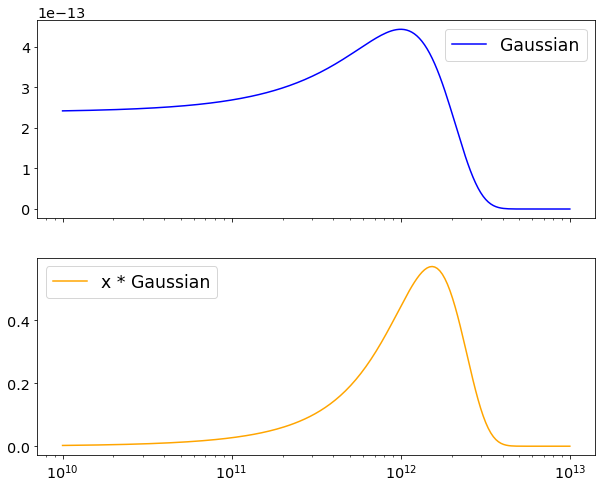

In [4]:
x = np.logspace(10,13, num=200)
mu = 1e12
sigma = 1e12 - 1e11

y1 = norm.pdf(x,mu,sigma)
y2 = x*norm.pdf(x,mu,sigma)

fig, axes = plt.subplots(2, sharex=True, figsize=(10,8))
axes[0].semilogx(x, y1, color='blue', label='Gaussian')
axes[1].semilogx(x, y2, color='orange' ,label='x * Gaussian')

axes[0].legend()
axes[1].legend()

print('The peak of the Gaussian is {} \nThe peak of the x*Gaussian is {}'.format(np.argmax(y1), np.argmax(y2)))

2. The following demonstrates the difference between a linspace and logspace on a linear and log plot scale

[   10.            11.51395399    13.25711366    15.26417967
    17.57510625    20.23589648    23.29951811    26.82695795
    30.88843596    35.56480306    40.94915062    47.14866363
    54.28675439    62.50551925    71.9685673     82.86427729
    95.40954763   109.8541142    126.48552169   145.63484775
   167.68329368   193.06977289   222.29964825   255.95479227
   294.70517026   339.32217719   390.69399371   449.8432669
   517.94746792   596.36233166   686.648845     790.60432109
   910.29817799  1048.11313415  1206.79264064  1389.49549437
  1599.85871961  1842.06996933  2120.95088792  2442.05309455
  2811.76869797  3237.45754282  3727.59372031  4291.93426013
  4941.71336132  5689.86602902  6551.2855686   7543.12006335
  8685.11373751 10000.        ]
[   10.           213.87755102   417.75510204   621.63265306
   825.51020408  1029.3877551   1233.26530612  1437.14285714
  1641.02040816  1844.89795918  2048.7755102   2252.65306122
  2456.53061224  2660.40816327  2864.28571429  3068.16

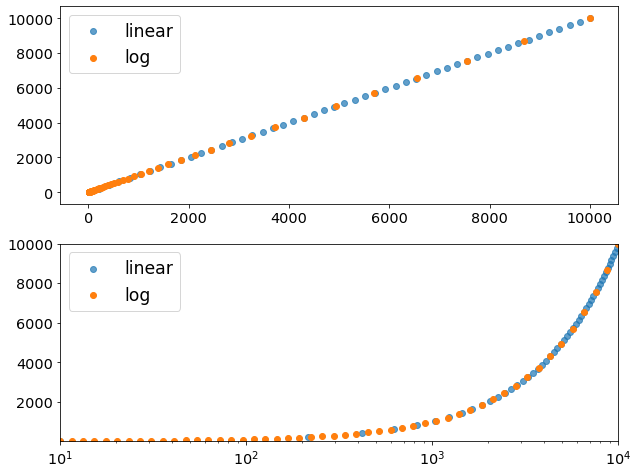

In [14]:
y = np.logspace(np.log10(3)+4, 4)
x = np.linspace(1e1, 1e4)
z = np.linspace(np.log10(1e1), np.log10(1e4))

#Plotting
fig, ax = plt.subplots(2, figsize=(10,8))
for i in range(2):
    ax[i].scatter(x,x, label='linear', alpha=0.7)
    ax[i].scatter(y,y, label='log')
    ax[i].legend()

#Gravy
plt.xscale('log')
plt.xlim(10, 1e4)
plt.ylim(10, 1e4);

print(y)
print(x)
print(10**z)

# L(M, z)

In [ ]:
#Inputs
redshifts = np.linspace(0.1, 5)
masses = np.logspace(12,14, num=200)
freq = 545.0e9 #Ghz

#Calculations
M, Z = np.meshgrid(masses, redshifts)
L = cib.luminosity(M, Z, freq)

#Plot
plt.figure(figsize=(9,5));
plt.contourf(M, Z, L, 10)
plt.colorbar();

#Plotting extras
plt.xscale('log')
plt.xlabel(r'Mass ($M_{\odot}$)')
plt.ylabel('Redshift')
plt.title('Luminosity');
plt.savefig('luminosity.png', bbox_inches='tight')

The dimensions of the SED function are power per steradian per area, in cgs. The luminosity function then has units of $M_{\odot}*\text{erg}*(s*sr*cm^2)^{-1}$

# The Full SED

In [ ]:
def blackbody(v, T):
    # Defining physical constants
    c = const.c.cgs.value
    h = const.h.cgs.value
    k_B = const.k_B.cgs.value
    
    return (2.0*h/c**2) * v**3 / (np.exp((v/T) * (h/k_B)) - 1.0)

def boltzmann(x, T):
    # Defining physical constants
    c = const.c.cgs.value
    h = const.h.cgs.value
    k_B = const.k_B.cgs.value
    
    return np.exp(h*x / (k_B*T))

def deriv_cond(v, T, b, g):
    # Defining physical constants
    c = const.c.cgs.value
    h = const.h.cgs.value
    k_B = const.k_B.cgs.value
    
    v_star = 1.0e12
    
    first_term = (b+3)
    second_term = - ((h * v)/(k_B * T)) * boltzmann(v,T) / (boltzmann(v,T) - 1)
    third_term = g
    
    return first_term + second_term + third_term

def sysEquations(var, *constants):
    temps, b, g = constants  
    vo_g = var[:temps.size]
    A_g = var[temps.size:]
    
    v_star = 1.0e12
    
    eq1 = (vo_g)**b * blackbody(vo_g, temps) - A_g * (vo_g)**(-g)
    eq2 = deriv_cond(vo_g, temps, b, g)

    return np.concatenate((eq1, eq2))

def sed(nu_obs, z, plot=False, beta=1.75, gamma=1.7, alpha=0.36):
    #Undoing Redshift: from Observing to Original
    nu = nu_obs * (1+z)
    temp_obs = 24.4
    temp_array = temp_obs * (1+z)**alpha
    
    #Get nu_o and proportionality constant
    v_star = 1.0e12
    nu_o_guess = np.ones(temp_array.shape, dtype=np.float64) * 1e12#/v_star
    A_guess = np.ones(temp_array.shape, dtype=np.float64) * 1e24
    sol = fsolve(sysEquations, (nu_o_guess, A_guess), args=(temp_array, beta, gamma))
    nu_o_array = sol[:temp_array.size]
    A_array = sol[temp_array.size:]
    
    #Plot the whole spectrum
    if plot:
        #Setup
        nu_range = np.logspace(9, 14, 2000)
        plt.figure()

        #Spectra
        for i, nu_o in enumerate(nu_o_array):
            #Calculation
            spectrum = np.where(nu_range<nu_o, (nu_range**beta)*blackbody(nu_range, temp_array[i]), A_array[i]*nu_range**(-gamma))
            
            #Plot curves
            plt.plot(nu_range, spectrum, label='{} {}'.format("z =", z[i]))
            print(f'Power: {(nu_o**beta)*blackbody(nu_o, temp_array[i]):e}    {A_array[i]*nu_o**(-gamma):e}')
            print(f'Freq : {nu[i]:e}    {nu_o:e} \n\n')
            
            #Marking v_o on the graph
            plt.axvline(x = nu_o, ls=':', lw=0.2)
            
        #Plot Properties
        plt.xscale('log')
        plt.yscale('log')
        plt.ylim([1e7, 1e12])
        plt.xlim([1e10, 1e15])
        plt.ylabel(r'$\Theta (\nu, z)$')
        plt.xlabel(r'$\nu$ (Hz)')
        plt.legend()
        plt.savefig('sed.png', dpi=900, bbox_inches='tight');
            
nu_obs = np.array([143.0e9])
redshifts = np.array([0, 1, 2])
sed(nu_obs, redshifts, plot=True)

In [ ]:
redshifts = np.array([1.])
sed(nu_obs, redshifts, plot=True)

plt.plot(nu_range, blackbody(nu_range, temp_array[i]), ls='--', alpha=0.5, label='{} {}'.format("BB for z =", z[i]))

In [ ]:
nuobs = 4
vo = np.array([5,6,4,7])

if nuobs>vo:
    print('lower spectrum')
else:
    print('upper spectrum')